# Определение перспективного тарифа для телеком-компании. 

Мы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг: Откроем файлы с данными и изучим общую информацию.
Путь к файлам:
* /datasets/calls.csv. 
* /datasets/internet.csv. 
* /datasets/messages.csv. 
* /datasets/tariffs.csv. 
* /datasets/users.csv.

**Импортируем библиотеки:** 

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from functools import reduce

**1.1. Прочитаем файлы и сохраним их в переменную — `df_calls`.**

In [161]:
df_calls = pd.read_csv('/datasets/calls.csv')
# выведем первые 15 строк датафрейма на экран
display(df_calls.head(15))
# выведем информацию о датафрейме
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

**1.2. Прочитаем файлы и сохраним их в переменную — `df_internet`.**

In [162]:
df_internet = pd.read_csv('/datasets/internet.csv')
# выведем первые 15 строк датафрейма на экран
display(df_internet.head(15))
# выведем информацию о датафрейме
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


* Unnamed: 0 — данные в стобце дублируют индексацию, удалим его в предобработке
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

**1.3. Прочитаем файлы и сохраним их в переменную — `df_messages`.**

In [163]:
df_messages = pd.read_csv('/datasets/messages.csv')
# выведем первые 15 строк датафрейма на экран
display(df_messages.head(15))
# выведем информацию о датафрейме
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

**1.4. Прочитаем файлы и сохраним их в переменную — `df_tariffs`.**

In [164]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
# выведем датафрейм на эран
display(df_tariffs)
# выведем информацию о датафрейме
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* tariff_name — название тарифа

**1.5. Прочитаем файлы и сохраним их в переменную — `df_users`.**

In [165]:
df_users = pd.read_csv('/datasets/users.csv')
# выведем первые 15 строк датафрейма на экран
display(df_users.head(15))
# выведем информацию о датафрейме
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


* user_id — уникальный идентификатор пользователя
* age — возраст пользователя (годы)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* reg_date — дата подключения тарифа (день, месяц, год)
* tariff — название тарифного плана

## Шаг: Предобработка данных.

**2.1. Предобработка в датафрейме — `df_calls`.**

In [166]:
# переведём тип данных столбца call_date в datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [167]:
# округлим значения времени звонков вверх и уберем дробную часть.
def ceil_value(value):
    return math.ceil(value)
df_calls['duration'] = df_calls['duration'].apply(ceil_value)   
df_calls['duration'] = df_calls['duration'].astype(int)
# display(df_calls)

In [168]:
# добавим новые столбцы, чтобы разделить день/месяц/год
df_calls['day_weekday'] = df_calls['call_date'].dt.weekday
df_calls['day_month'] = df_calls['call_date'].dt.month
df_calls['day_year'] = df_calls['call_date'].dt.year
# для проверки выведем первые пять строк датафрейма на экран
# display(df_calls.head())

**2.2. Предобработка в датафрейме — `df_internet`.**

In [169]:
# видим, что данные session_date имеют не верный формат. Переведём данные столбца в тип datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [170]:
# Удалим столбец Unnamed: 0 так как он не несет в себе важной информации.
df_internet = df_internet.drop(df_internet.columns[[0]], axis=1)

In [171]:
# добавим столбцы с отправленными сообщениями на день/месяц/год.
df_internet['day_weekday'] = df_internet['session_date'].dt.weekday
df_internet['day_month'] = df_internet['session_date'].dt.month
df_internet['day_year'] = df_internet['session_date'].dt.year
# для проверки выведем первые пять строк датафрейма на экран
# display(df_internet.head())

**2.3. Предобработка в датафрейме — `df_messages`.**

In [172]:
# видим, что данные message_date так же не верного типа. Переведём данные столбца в тип datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [173]:
# добавим столбцы с отправленными сообщениями на день/месяц/год
df_messages['day_weekday'] = df_messages['message_date'].dt.weekday
df_messages['day_month'] = df_messages['message_date'].dt.month
df_messages['day_year'] = df_messages['message_date'].dt.year
# для проверки выведем первые пять строк датафрейма на экран
# display(df_messages.head())

**2.4. Предобработка в датафрейме — `df_tariffs`.**

In [174]:
display(df_tariffs)
# данные в порядке, ничего менять не будем.

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**2.5. Предобработка в датафрейме — `df_users`.**

In [175]:
# мы обнаружили, что данные churn_date, reg_date не верного типа. Переведём данные столбцы в тип datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [176]:
#добавим информацию о тарифах в users в виде 0 и 1
def tariff_id(object):
    if object == 'smart':
        return 0
    elif object == 'ultra':
        return 1
df_users['tariff_id'] = df_users['tariff'].apply(tariff_id)

In [177]:
# NaN значения в churn_date говорят, что тариф для пользователя еще действовал на момент выгрузки
print('Количество пользователей для которых тариф еще действует:', df_users['churn_date'].isna().sum())
print('Количество пользвателей, для которых не действует тариф:', df_users['churn_date'].value_counts().sum())

Количество пользователей для которых тариф еще действует: 462
Количество пользвателей, для которых не действует тариф: 38


In [178]:
# приведем даты в churn_date к типу datetime:
def to_dt_func(row):
    if row != 0:
        return pd.to_datetime(row, format='%Y-%m-%d')
    else:
        return 0
    
df_users['churn_date'] = df_users['churn_date'].apply(to_dt_func)

**Выводы:**
1. Данные обработаны, даты заменены на объекты datetime.
2. В таблице df_users вместо пропусков подставлены нули.
3. В таблице df_calls были округлены до целого вверх длительности разговоров и нулевые значения были заменены на единицы.
4. В таблице df_internet были округлены до целого вверх значения трафика.

**2.6. Расчеты:**
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;

In [179]:
# для подсчета количества при создании сводной таблицы сгенерируем уникальный код из имени и населенного пункта
df_users['unique_name'] = df_users['city'] + df_users['first_name'] + df_users['last_name']


# сводная таблица по звонкам
df_calls_temp = df_calls.merge(df_users, on='user_id', how='inner')
df_calls_grouped = df_calls_temp.pivot_table(values=['unique_name', 'duration'], 
                       index=['user_id', 'day_month'], 
                       aggfunc={'unique_name': 'count', 'duration': 'sum'})
df_calls_grouped.columns = ['duration', 'calls']


# сводная таблица по сообщениям
df_messages_temp = df_messages.merge(df_users, on='user_id', how='inner')
df_messages_grouped = df_messages_temp.pivot_table(values='unique_name', 
                       index=['user_id', 'day_month'], 
                       aggfunc={'unique_name': 'count'})
df_messages_grouped.columns = ['messages']


# сводная таблица по интернет-трафику
df_internet_temp = df_internet.merge(df_users, on='user_id', how='inner')
df_internet_grouped = df_internet_temp.pivot_table(values='mb_used', 
                       index=['user_id', 'day_month'], 
                       aggfunc={'mb_used': 'sum'})
df_internet_grouped.columns = ['mb_used']


# объединяем все три сводные таблицы в одну
dfs = [df_calls_grouped, df_messages_grouped, df_internet_grouped]
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'day_month'], how='outer'), dfs)
# display(grouped_data.head(15))



print('Количество пропущенных значений в столбце mb_used', grouped_data['mb_used'].isna().sum())
# после групировки таблицы образовалось 11 строк с пропусками NaN заменим их на 0 
grouped_data['mb_used'] = grouped_data['mb_used'].fillna(0)

# округлим дробную часть "килобайты" в большую сторону и привидем в целочисленный формат 
def ceil_value(value):
    return math.ceil(value)
 
grouped_data['mb_used'] = grouped_data['mb_used'].apply(ceil_value)
grouped_data['mb_used'] = grouped_data['mb_used'].astype(int)

# приведем мегабайты в гигабайты тля соответствия условию задачи, округлим мегабайты до гигабайт в большую сторону
# и приведем в челочисленный формат
grouped_data['mb_used'] = grouped_data['mb_used']/1000 
grouped_data['mb_used'] = grouped_data['mb_used'].apply(ceil_value)
grouped_data['mb_used'] = grouped_data['mb_used'].astype(int)

# Заменим название столбца mb_used на gb_used для соответствия условиям задачи
grouped_data.rename(columns = {'user_id':'user_id', 'day_month':'day_month',
                           'duration':'duration', 'calls':'calls',
                           'messages':'messages', 'mb_used':'gb_used'}, inplace = True)

print(grouped_data.isna().sum())
display(grouped_data.head(15))

Количество пропущенных значений в столбце mb_used 11
duration     40
calls        40
messages    497
gb_used       0
dtype: int64


duration  calls  messages  gb_used
user_id day_month                                    
1000    5             159.0   22.0      22.0        3
        6             172.0   43.0      60.0       24
        7             340.0   47.0      75.0       15
        8             408.0   52.0      81.0       15
        9             466.0   58.0      57.0       15
        10            350.0   57.0      73.0       15
        11            338.0   43.0      58.0       15
        12            333.0   46.0      70.0       10
1001    11            430.0   59.0       NaN       19
        12            414.0   63.0       NaN       15
1002    6             117.0   15.0       4.0       11
        7             214.0   26.0      11.0       18
        8             289.0   42.0      13.0       21
        9             206.0   36.0       4.0       17
        10            212.0   33.0      10.0       14

Теперь для каждого пользователя почитаем помесячную выручку (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; пирбавим абонентскую плату, соответствующую тарифному плану).

In [180]:
# пропущенные значения заменяем на нули
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['gb_used'].isna(), 'gb_used'] = 0

# добавим наименование используемого тарифа для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = df_users.loc[user[0]-1000, 'tariff']
    
# функция подсчета выручки с каждого пользователя в месяц
def income(row):
    messages = row['messages']
    gb_used = row['gb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - df_tariffs.loc[0, 'minutes_included']
        extra_mb = gb_used - df_tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        extra_duration = duration - df_tariffs.loc[1, 'minutes_included']
        extra_mb = gb_used - df_tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[1, 'rub_monthly_fee']
                  )

grouped_data['income'] = grouped_data.apply(income, axis=1)
display(grouped_data.head(10))

# создадим генеральный датафрейм со значениями общего дохода для каждого пользователя, города его проживания, названия его 
# тарифа, и.т.д.
general_data = grouped_data.merge(df_users, on='user_id', how='inner')
# display(general_data.head(15))

duration  calls  messages  gb_used tariff  income
user_id day_month                                                   
1000    5             159.0   22.0      22.0        3  ultra  1950.0
        6             172.0   43.0      60.0       24  ultra  1950.0
        7             340.0   47.0      75.0       15  ultra  1950.0
        8             408.0   52.0      81.0       15  ultra  1950.0
        9             466.0   58.0      57.0       15  ultra  1950.0
        10            350.0   57.0      73.0       15  ultra  1950.0
        11            338.0   43.0      58.0       15  ultra  1950.0
        12            333.0   46.0      70.0       10  ultra  1950.0
1001    11            430.0   59.0       0.0       19  smart   550.0
        12            414.0   63.0       0.0       15  smart   550.0

## Шаг. Проанализируем данные

* Опишем поведение клиентов оператора, исходя из выборки. 
Сколько минут разговора? 
Сколько сообщений?
Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* Посчитаем среднее количество, дисперсию и стандартное отклонение. 
* Построем гистограммы. 
* Опишем распределения.

**3.1. посчитаем, сколько в среднем каждому пользователю требуется минут, сообщений и мегабайт в месяц**

In [181]:
medians = grouped_data.pivot_table(index='user_id', values=['duration', 'messages', 'gb_used', 'income'], aggfunc='median')

for user_id in df_users['user_id']:
    medians.loc[user_id, 'tariff'] = df_users.loc[user_id-1000, 'tariff']
medians.head()

,duration,gb_used,income,messages,tariff
user_id,,,,,
1000,339.0,15.0,1950.0,65.0,ultra
1001,422.0,17.0,550.0,0.0,smart
1002,214.0,18.0,550.0,11.0,smart
1003,824.0,12.0,1950.0,83.0,ultra
1004,132.5,18.5,1950.0,154.5,ultra


**3.2. Найдем среднее, дисперсию и стандартное отклонение**

In [182]:
medians.dropna(subset=['duration'], inplace=True)
desc_stat = medians.pivot_table(index=['tariff'], values=['duration', 'gb_used', 'messages'], 
                    aggfunc={'duration': [np.mean, np.var, np.std], 
                             'gb_used': [np.mean, np.var, np.std], 
                             'messages': [np.mean, np.var, np.std]})
display(desc_stat)

duration                              gb_used                       \
              mean         std           var       mean       std        var   
tariff                                                                         
smart   437.468571  160.266622  25685.390127  17.325714  4.170908  17.396472   
ultra   557.503378  303.793641  92290.576519  20.810811  8.938072  79.889134   

         messages                          
             mean        std          var  
tariff                                     
smart   33.770000  28.010653   784.596662  
ultra   56.983108  49.236809  2424.263318

**3.3. Построем гистограммы**

In [183]:
# cохраним в переменную sum_smart таблицу пользователей с тарифом Smart
sum_smart = grouped_data[(grouped_data['tariff'] == 'smart')]

# cохраним в переменную sum_ultra таблицу пользователей с тарифом Ultra
sum_ultra = grouped_data[(grouped_data['tariff'] == 'ultra')]

**Выведим гистограммы со статистикой пользователей Smart**

Построим гистограмму с кол-ством минут для тарифа.

<AxesSubplot:>

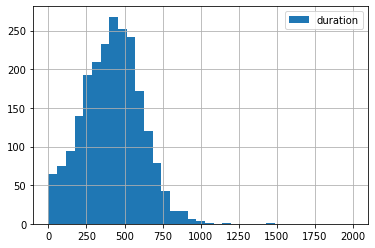

In [228]:
sum_smart['duration'].hist(bins=35, range = (0, 2000), legend='duration')

**Вывод:**
Видим, что пик затрат минут как раз приходится на лимит тарифа: 250 - 500 минут, но довольно много пользователей тратят больше лимита, доходя до 600 - 750 минут, встречаются и около 1000.

Построим гистограмму с кол-ством сообщений для тарифа.

<AxesSubplot:>

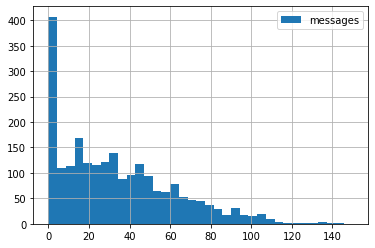

In [211]:
sum_smart['messages'].hist(bins=35, range = (0, 150), legend='messages')

**Вывод:**
Видим, что очень много пользователей не отправляют сообщения, либо отправляют не более 5-ти.
Несмотря на лимит в 50 сообщений, не мало пользователей превышают его и довольно много встречаются отправки 50-80 сообщений, есть выше 100 сообщений.

Построим гистограмму с кол-ством мегабайт для тарифа.

<AxesSubplot:>

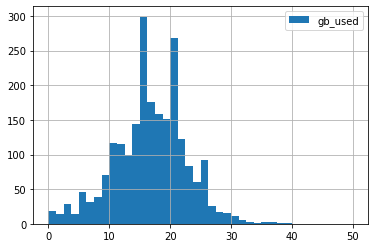

In [210]:
sum_smart['gb_used'].hist(bins=40, range = (0, 50), legend='gb_used')

**Вывод:** Видим, что небольшая часть пользователей не пользуются интернетом, либо же используют не больше 5 гб.
Пик припадает на уровне 15 гб, но много пользователей превышают данный лимит и хвост доходит к 0 только ближе к 30 гб.

**Выведим гистограммы со статистикой пользователей Ultra**

Построим гистограмму с кол-ством минут для тарифа.

<AxesSubplot:>

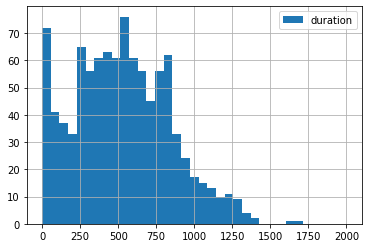

In [209]:
sum_ultra['duration'].hist(bins=35, range = (0, 2000), legend='duration')

**Вывод:** Видим, что небольшая часть пользователей не пользуются сотовой связью, либо же используют не больше 250 минут.
Пик кол-ства минут находится около 500-600 минут и держится до 800 минут, далее резкий спад, хвост приближается к 0 после 1300 минут.

Построим гистограмму с кол-ством сообщений для тарифа.

<AxesSubplot:>

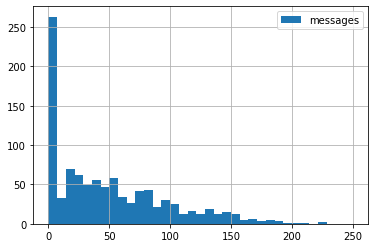

In [208]:
sum_ultra['messages'].hist(bins=35, range = (0, 250), legend='messages')

**Вывод:** Видим, что очень много пользователей не отпрааляю сообщения, либо же отправляют не больше 5.
Те, кто пользуется отправкой сообщений отправляет около 20-100 сообщений, хвост приближается к 0 после 150 сообщений.

Построим гистограмму с кол-ством мегабайт для тарифа.

<AxesSubplot:>

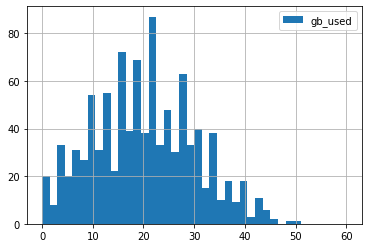

In [227]:
sum_ultra['gb_used'].hist(bins=40, range = (0, 60), legend='gb_used')

**Вывод:** Видим, что небольшая часть пользователей не использует интернет.
Пик мегабайт приходит на 20-23 гб, так же виден скачёк ближе к 30 гб, хвост приближается к 0 после 45 гб.

## Шаг . Проверим гипотезы


Гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Поясним:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

Критический уровень статистической значимости присвоим значением 0.05.

**4.1.** Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой генеральной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее генеральной совокупности не равно второй.

Будем проверять гипотезу H₀ которая будет гласить: среднее двух генеральных совокупностей равны друг другу.
Следовательно гипотеза H₁ будет гласить что среднее двух генеральных совокупностей не равны.

In [190]:
smart = sum_smart['income']
ultra = sum_ultra['income']

print('cреднее Smart: ',pd.Series(smart).mean())
print('cреднее Ultra: ',pd.Series(ultra).mean())

alpha = 0.05

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее Smart:  692.2166890982503
cреднее Ultra:  1950.0
p-значение: 0.0
Отвергаем нулевую гипотезу


Исходя из выводов мы видим что среднее генеральных совокупностей сильно разлечается, соответсвенно мы можем отвергнуть гипотезу H₀. Точнее сказать только исходя из проверки гипотезы мы не можем сказать что больше, только что количество выручки отличается. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для обоих тарифов, с уверенностью можем сказать: cредняя выручка из тарифа Ultra выше.

**4.2.** Проверка гипотезы что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза H₀ будет гласить что средняя выручка для пользователей из Москву равна средней выручке пользователей из других регионов, соответственно гипотеза H₁ будет говорить об обратном.

In [193]:
# cохраним moscow_income список пользователей из Москвы.
moscow_income = general_data[(general_data['city'] == 'Москва')]

# cохраним other_income список пользователей из других регионов.
other_income = general_data[(general_data['city'] != 'Москва')]

Проверим, отличается ли среднняя выручка по пользователям Москвы и других регионов.

In [194]:
moscow = moscow_income['income']
other = other_income['income']

print('Выручка по Москве: ',pd.Series(moscow).mean())
print('Выручка с других регионов: ',pd.Series(other).mean())

alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве:  1147.859247135843
Выручка с других регионов:  1061.2212831348445
p-значение: 0.0018497307474415958
Отвергаем нулевую гипотезу


По данным полученным в результате вывода кода можем сказать что выручка по Москве и других регионам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

## Шаг. Общий вывод

Исходя из проделанной работы мы можем посоветовать компании следующее: Общая прибыль больше всего у тарифа Smart. Больше всего дополнительного дохода приносит тариф Smart. Его пользователи часто не вклиниваются в лимиты, чаще всего по кол-ству минут и очень много по лимиту мегабайт. Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета. Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra. Разница в средней вырчки из Москвы и других регонов - незначительная, это относится и к сравнению тарифов по Москве и регионам.

В соответсвии с выводами я бы рекомендовал компании "Мегалайн" расширить круг пользователей тарифа Smart, провести рекламную компанию для привлечения большего числа клиентов!